# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats.mstats

df = pd.read_csv('data/human_body_temperature.csv')

#print(df)

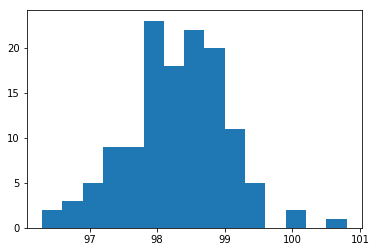

In [2]:
plt.hist(df['temperature'],bins=15)
plt.show()

In [3]:
print(np.mean(df['temperature']))
print(np.median(df['temperature']))
print(df['temperature'].mode())

98.2492307692
98.3
0    98.0
dtype: float64


In [4]:
scipy.stats.mstats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

1) The distribution of body temperatures is normal. This is concluded from checking whether the mean, median and mode of body temperatures are equal to one another. The mean, median and mode of body temperatures are 98.249, 98.3 and 98.0 respectively. Given the small sample set (130 samples), it can be said that inspite of the mode not being equal to the mean and median, this data is still normal. Scipy package normal test gives a p-value of 0.25. The normal test has a null hypothesis which states that the sample comes from a normal distribution. The high p-value confirms this and the null hypothesis is accepted.    

In [5]:
from scipy.stats.stats import pearsonr

pearsonr(df['temperature'],df['heart_rate'])

(0.25365640272076417, 0.003591489250708233)

2.1) A sample is considered to have a large sample size if the number of samples is greater than 30. This data has a sample size of 130. So, this data has a large sample size. 

2.2) For the question on whether the data is independent, a pearson correlation was calculated between temperature and heart rate columns. The correlation co-efficient was 0.253. This shows that the temperature data does not have high degree of correlation with heart rate, the only other numerical variable in this dataset. So, it can be concluded that the data is independent. 

In [3]:
z=(np.mean(df['temperature'])-98.6)/(np.std(df['temperature'])/(129**0.5))

p = 1-scipy.special.ndtr(z)

print(p)

0.999999975489


In [32]:
scipy.stats.ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

3.1) A 1 sample test is most appropriate here since the 1 sample test is used to compare the sample mean with a given population mean. In this case, we have a sample mean of temperature from the given dataset and have a population mean that has been in use for 120 years. A 2 sample test is used to make comparisons between 2 population means. Since we do not have 2 population means here, we use 1 sample t-test.

3.2) In this situation, it is appropriate to use the t-statistic since the population standard deviation is unknown. If the population standard deviation were known, then we would have used z-statistic since the sample size is more than 30.

3.3) The 1 sample t-test gives a p-value of 0.000000241. The scipy 1 sample t-test has a null hypothesis which states that the sample mean of observation is equal to the population mean. The low p-value indicates that this null hypothesis can be rejected using 0.05 significance level. So, based on the 1 sample t-test, we conclude that our sample dataset is not representative of the population or that the earlier assumed true population mean of body temperature, which was 98.6, is incorrect.  

The 1 sample z-test gives a p-value of 0.99. This was calculated by first finding the Z score, which is the (Sample mean - Population mean)/Sample standard deviation. Using the scipy ndtr function, we further find p-value. The 1 sample z-test has a null hypothesis which states that the sample mean of the given temperature dataset equals the population mean of human body temperature. The p-value obtained from the 1 sample z-test allows us to keep the null hypothesis. 



In [9]:
df_sampled=np.random.choice(df['temperature'],size=10)

print(df_sampled)

[ 98.2  98.   98.6  97.9  98.5  98.6  98.1  97.2  97.8  97.1]


In [14]:
z_sampled=(np.mean(df_sampled)-98.6)/(np.std(df_sampled)/(10**0.5))

p = 1-scipy.special.ndtr(z_sampled)

print(p)

0.999921473858


In [11]:
scipy.stats.ttest_1samp(df_sampled,98.6)

Ttest_1sampResult(statistic=-3.5856858280032373, pvalue=0.005878275489917241)

4) After taking the sample of 10 observations, we must still use the t-test since the population standard deviation of temperature is unknown. With the smaller sample, the t-test gives p-value of 0.0058. While the null hypothesis can still be rejected at 0.05 significance level, the p-value of the 10 observation sample is substantially larger than the p-value of the 130 observation sample. Similarly, the p-value of the z-test has also increased in magnitude. This shows that as the sample size gets smaller, it is harder to reject the null hypothesis.

In [30]:
scipy.stats.t.interval(0.95,129,loc=98.249,scale=(np.std(df['temperature'])/(130**0.5)))

(98.122262418985628, 98.375737581014363)

5) If the body temperatures of people are normally distributed, we can assume the last 2.5% of temperatures on either ends of the distribution to be abnormal. So, keeping alpha as 0.05, we calculate the values of upper and lower bounds at a confidence level of 0.95. This comes out to (98.122, 98.375). So, a temperature reading below 98.122 or above 98.375 will be considered abnormal.

In [38]:
df_male = df[df['gender']=='M']
df_female=df[df['gender']=='F']

scipy.stats.ttest_ind(np.mean(df_male),np.mean(df_female))

Ttest_indResult(statistic=-0.0310068031955287, pvalue=0.97808014712086)

6) By splitting the data based on gender, we can now test whether there is a significant difference in body temperatures between men and women. For this, we perform the 2 sample t-test since we are now trying to compare the population means of the 2 samples and we still do not know the population standard deviation. The 2 sample t-test null hypothesis states that the 2 samples have identical true population means. The high p-value supports this null hypothesis.

7) Based on the available data, we can conclude that 1) The sample data is normal and independent  2) The sample data rejects the notion that true human body temperature is 98.6. While it is possible that sampling was done incorrectly, the current sample rejects this notion. 3) Finally, based on the sample data, we conclude that there is no significant difference in the population means of body temperatures of men and women.